In [3]:
import pandas as pd # For data manipulation
import sqlite3     # For database operations
import matplotlib.pyplot as plt # For data visualization

 # Read a file
df=pd.read_csv('/content/company_employee_details.csv')
df.head()

,Unnamed: 0,company,department,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor
0,0,Glasses,BigData,16,41,38,3,68074.97135,17664.10410,3,0.000000,0.000000,1.000000
1,1,Glasses,AI,56,44,42,2,49092.14746,21551.14108,2,0.000000,0.184991,1.000000
2,2,Cheerper,Support,59,41,40,1,40000.00000,23698.87885,2,0.000000,0.919887,0.662706
3,3,Glasses,Design,40,39,32,7,108192.46550,21570.92966,1,0.930396,0.546206,0.000000
4,4,Glasses,Search Engine,47,30,22,9,71291.19113,21565.50572,2,0.525432,0.938412,0.000000


In [4]:
# Connect to SQLite (creates a database file)
conn=sqlite3.connect("company.db")
cursor=conn.cursor()

# Create a Company details table
cursor.execute('''
CREATE TABLE IF NOT EXISTS company_details(
id INTEGER PRIMARY KEY AUTOINCREMENT,
company_name TEXT,
department TEXT,
salary INTEGER,
anual_bonus INTEGER,
employee_id INTEGER
)
 ''')

# Insert Company data into the table
df.to_sql('company_details', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()

In [6]:
#Total number of workers per company
employee_quantity=df.groupby('company')['employee_id'].count().reset_index() #.reset_index() to get clear output with title.
print(employee_quantity)


    company  employee_id
0  Cheerper         1440
1   Glasses         2369
2      Pear         1191


In [5]:
#Overall salary per company
df['salary']=df['salary'].astype(int) # change datatype into INTEGER format
company_wise_salary=df.groupby('company')['salary'].sum().reset_index()
print(company_wise_salary)

    company     salary
0  Cheerper  108729956
1   Glasses  207941156
2      Pear  119175444


In [7]:
#Overall anual bonus per company
df['annual_bonus']=df['annual_bonus'].astype(int) # change datatype into INTEGER format
company_wise_bonus=df.groupby('company')['annual_bonus'].sum().reset_index()#sum() is caculate the sum of anual bonus
print(company_wise_bonus)

    company  annual_bonus
0  Cheerper      25556981
1   Glasses      44237139
2      Pear      23216527


In [8]:
#Highest salary department in Glasses company
df['salary']=df['salary'].astype(int)
df_company=df[df['company']== 'Glasses'] # Select specfic company name
df_max=df_company.sort_values(by='salary',ascending=False) # df.sort_values() function sort the salary in DESC order.
heighst_salary=df_max.groupby('department')['salary'].sum().reset_index()
maximum=heighst_salary.max() #Get a maximum salary department
print(maximum)


department     Support
salary        90513729
dtype: object


In [9]:
#Lowest workers count per company
employee_quantity=df.groupby('company')['employee_id'].count().reset_index()
minium_employee=employee_quantity.min() # Get a lowest employee count per company
print(minium_employee)


company        Cheerper
employee_id        1191
dtype: object


In [11]:
#Calculate employee count for selective department
employye_count=df[df["department"].isin(["BigData", "Design"])] #applying filter to get specific dept
count_emp=employye_count.groupby('department')['employee_id'].count().reset_index()
print(count_emp)


  department  employee_id
0    BigData          797
1     Design          720


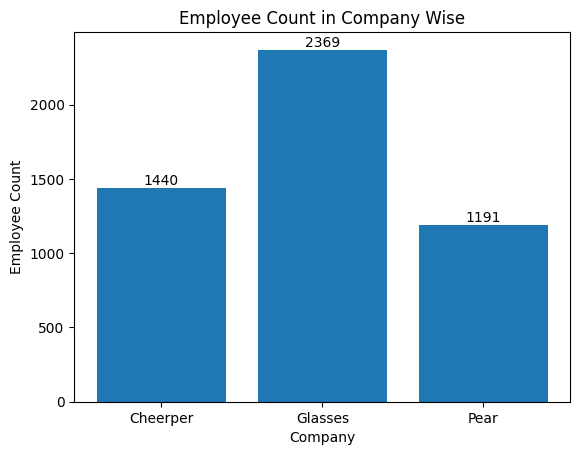

In [12]:
# Show the data lable of category values
for i in range(len(employee_quantity['company'])):
    plt.text(i, employee_quantity['employee_id'][i], employee_quantity['employee_id'][i], ha='center', va='bottom')

#plot employee count in company wise
plt.bar(employee_quantity['company'], employee_quantity['employee_id'])
plt.xlabel('Company')
plt.ylabel('Employee Count')
plt.title('Employee Count in Company Wise')
plt.show()

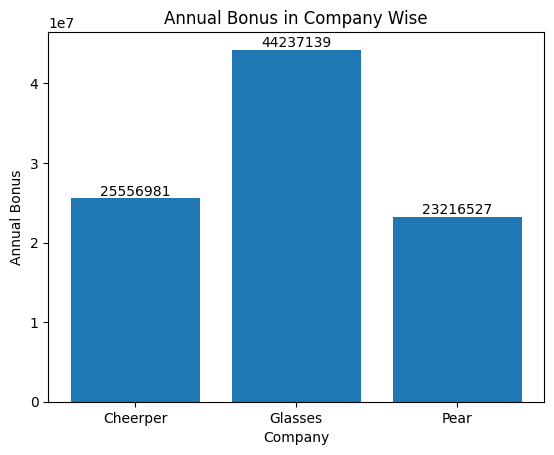

In [13]:
# Show the data lable of anual bonus

for i in range(len(company_wise_bonus['company'])):
    plt.text(i, company_wise_bonus['annual_bonus'][i], company_wise_bonus['annual_bonus'][i], ha='center', va='bottom')


#plot anual bonus in company wise
plt.bar(company_wise_bonus['company'], company_wise_bonus['annual_bonus'])
plt.xlabel('Company')
plt.ylabel('Annual Bonus')
plt.title('Annual Bonus in Company Wise')
plt.show()



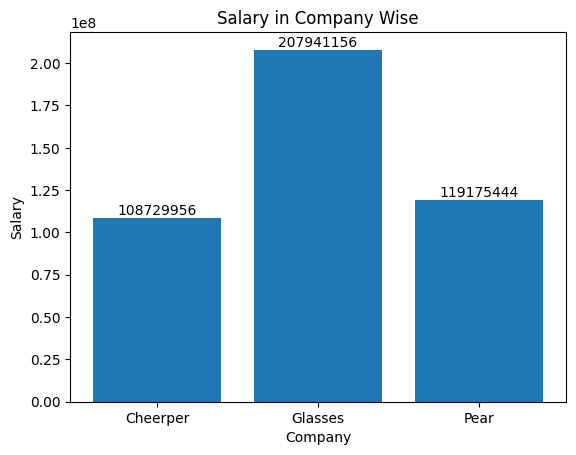

In [14]:
for i in range(len(company_wise_salary['company'])):
    plt.text(i, company_wise_salary['salary'][i], company_wise_salary['salary'][i], ha='center', va='bottom')

#plot salary in company wise
plt.bar(company_wise_salary['company'], company_wise_salary['salary'])
plt.xlabel('Company')
plt.ylabel('Salary')
plt.title('Salary in Company Wise')
plt.show()


Dropdown(description='Company:', options=('Glasses', 'Cheerper', 'Pear'), value='Glasses')

Dropdown(description='years_in_the_company:', options=(3, 2, 1, 7, 9, 5, 4, 6, 8), value=3)

SelectMultiple(description='Department:', index=(0, 1, 2, 3, 4, 5), options=('BigData', 'AI', 'Support', 'Desi…

IntRangeSlider(value=(40000, 153000), description='Salary Range:', max=153000, min=40000, step=1000)

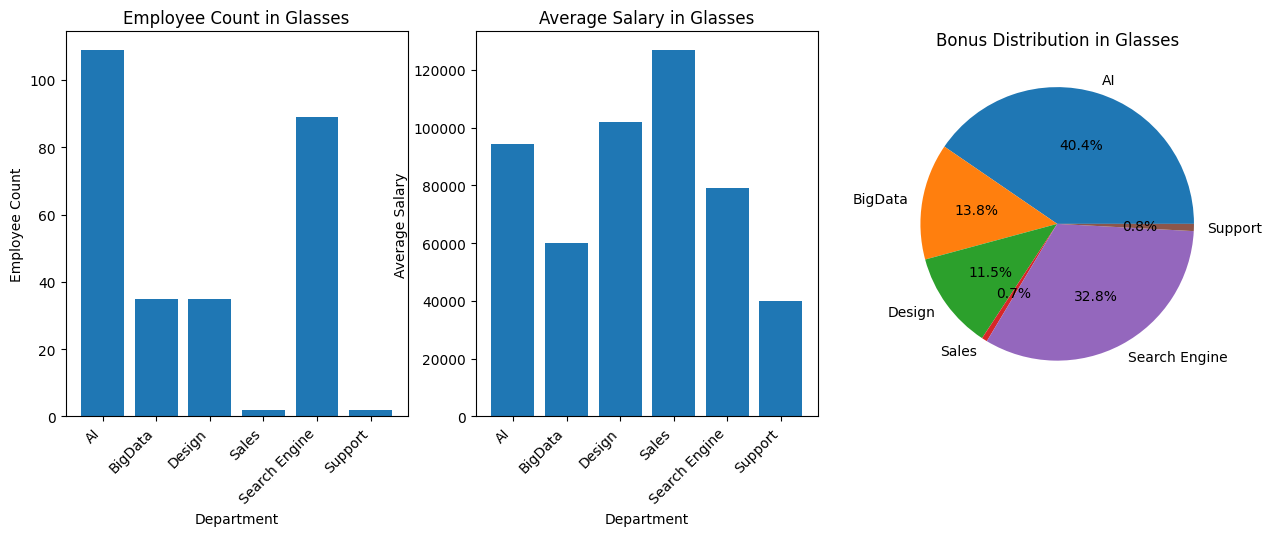

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets #build interactive UI elements like sliders, buttons, dropdowns, and text inputs
from IPython.display import display, clear_output #control the output display(clear output is update the currect output and clear the ols output)

# Assuming df is already loaded as in your provided code

# Create interactive widgets
company_filter = widgets.Dropdown(
    options=df['company'].unique().tolist(),
    value=df['company'].unique().tolist()[0],
    description='Company:'

)

exp_filter = widgets.Dropdown(
    options=df['years_in_the_company'].unique().tolist(),
    value=df['years_in_the_company'].unique().tolist()[0],
    description='years_in_the_company:'
)


department_filter = widgets.SelectMultiple(
    options=df['department'].unique().tolist(),
    value=df['department'].unique().tolist(),
    description='Department:'
)

salary_slider = widgets.IntRangeSlider(
    value=[df['salary'].min(), df['salary'].max()],
    min=df['salary'].min(),
    max=df['salary'].max(),
    step=1000,
    description='Salary Range:'
)


def update_plots(change):
    selected_company = company_filter.value
    selected_years = exp_filter.value
    selected_departments = department_filter.value
    min_salary, max_salary = salary_slider.value

    filtered_df = df[df['company'] == selected_company]
    filtered_df = filtered_df[filtered_df['years_in_the_company'] == selected_years]
    filtered_df = filtered_df[filtered_df['department'].isin(selected_departments)]
    filtered_df = filtered_df[(filtered_df['salary'] >= min_salary) & (filtered_df['salary'] <= max_salary)]

    clear_output(wait=True)
    display(company_filter,exp_filter, department_filter, salary_slider)

    plt.figure(figsize=(15, 5))  # Adjust figure size for better layout

    # Plot 1: Employee Count
    employee_quantity = filtered_df.groupby('department')['employee_id'].count().reset_index()
    plt.subplot(1,3,1)  # 1 row, 3 columns, first subplot
    plt.bar(employee_quantity['department'], employee_quantity['employee_id'])
    plt.xlabel('Department')
    plt.ylabel('Employee Count')
    plt.title(f'Employee Count in {selected_company}')
    plt.xticks(rotation=45, ha='right')

# Plot 2: Average Salary
    avg_salary = filtered_df.groupby('department')['salary'].mean().reset_index()
    plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
    plt.bar(avg_salary['department'], avg_salary['salary'])
    plt.xlabel('Department')
    plt.ylabel('Average Salary')
    plt.title(f'Average Salary in {selected_company}')
    plt.xticks(rotation=45, ha='right')

 # Plot 3: Bonus distribution
    bonus_sum = filtered_df.groupby('department')['annual_bonus'].sum().reset_index()
    plt.subplot(1, 3, 3)  # 1 row, 3 columns, second subplot
    plt.pie(bonus_sum['annual_bonus'], labels=bonus_sum['department'], autopct='%1.1f%%')
    plt.title(f'Bonus Distribution in {selected_company}')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# Observe changes in widgets
company_filter.observe(update_plots, names='value')
exp_filter.observe(update_plots, names='value')
department_filter.observe(update_plots, names='value')
salary_slider.observe(update_plots, names='value')

# Initial display
display(company_filter, exp_filter,department_filter, salary_slider)
update_plots(None) # Initial plot rendering